# output pdf
This scripts calculates the output pdf of a GWN through a sigmoid transfer function.

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.special import logit


def sigmoid(x, beta:float=1, x_0:float=0):
    return 1 / (1 + np.exp(-beta*(x - x_0)))


def out_pdf(x, x0:float=0.):
    factor = 1 / np.sqrt(2 * np.pi)
    der = 1 / (x - x**2)
    dist = np.exp(-.5 * (logit(x)+x0)**2)
    return factor * der * dist


In [28]:
x0 = -2
dx = .001
x_dist = np.arange(dx, 1, dx)

def plot_dists(x0, axis=None):
    ax = axis or plt
    samples = np.random.normal(size=50_000)
    out = sigmoid(samples, x_0=x0)
    
    ax.hist(out, bins=x_dist, density=True, label="simulation")

    out_dist = out_pdf(x_dist, x0=x0)
    
    ax.plot(x_dist, out_dist, label=r"$f_Y(y)$")
    ax.axvline((x_dist * out_dist).sum() * dx, c="r", label=r"$\langle \nu(y) \rangle$")
    ax.axvline(sigmoid(0, x_0=x0), c="k", ls="--", label=r'$\nu_{SS}$')
    xlabel = ax.set_xlabel if axis is not None else plt.xlabel
    ylabel = ax.set_ylabel if axis is not None else plt.ylabel
    xlabel(r"output rate $\nu$")
    ylabel("probability density")
    ax.legend()

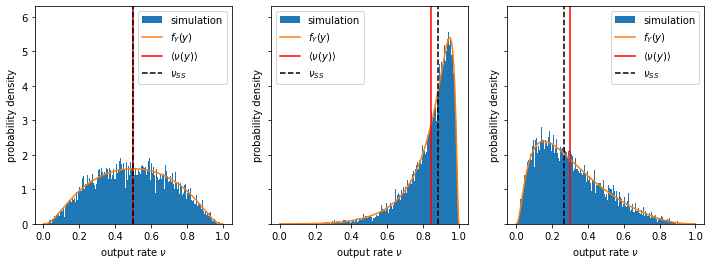

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(12, 4))
plot_dists(x0=0, axis=ax[0])
plot_dists(x0=x0, axis=ax[1])
plot_dists(x0=-x0/2, axis=ax[2])
fig.savefig("rate_distribution.svg")

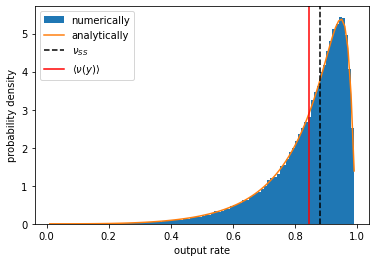

In [4]:
plot_dists(x0=x0)